<a href="https://colab.research.google.com/github/SHANMUGA000/LIVER-CIRRHOSIS-PREDICTION/blob/main/Health_care_Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Health Care Analytics**

**Mini Project**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

**Import the csv file**

In [ ]:
df = pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Data Cleaning and Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
missing_columns = ['Drug', 'Ascites', 'Hepatomegaly',
                   'Spiders', 'Cholesterol', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides',
                   'Platelets', 'Prothrombin', 'Stage']


df = df.dropna(subset=missing_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [ ]:
columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

for column in columns:
    print(f'The unique values of {column}: {df[column].unique()}')

The unique values of Status: ['D' 'C' 'CL']
The unique values of Drug: ['D-penicillamine' 'Placebo']
The unique values of Sex: ['F' 'M']
The unique values of Ascites: ['Y' 'N']
The unique values of Hepatomegaly: ['Y' 'N']
The unique values of Spiders: ['Y' 'N']
The unique values of Edema: ['Y' 'N' 'S']
The unique values of Stage: [4. 3. 2. 1.]


In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,18189.326087,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,91.662926,1112.380295,3843.555619,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,79.750000,1185.750000,15162.500000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,157.500000,1788.000000,18156.500000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,240.250000,2689.750000,20667.500000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [ ]:

df['Age'] = df['Age'] / 365.25
df['Age'] = df['Age'].astype(int)

df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Exploratory Data Analysis**

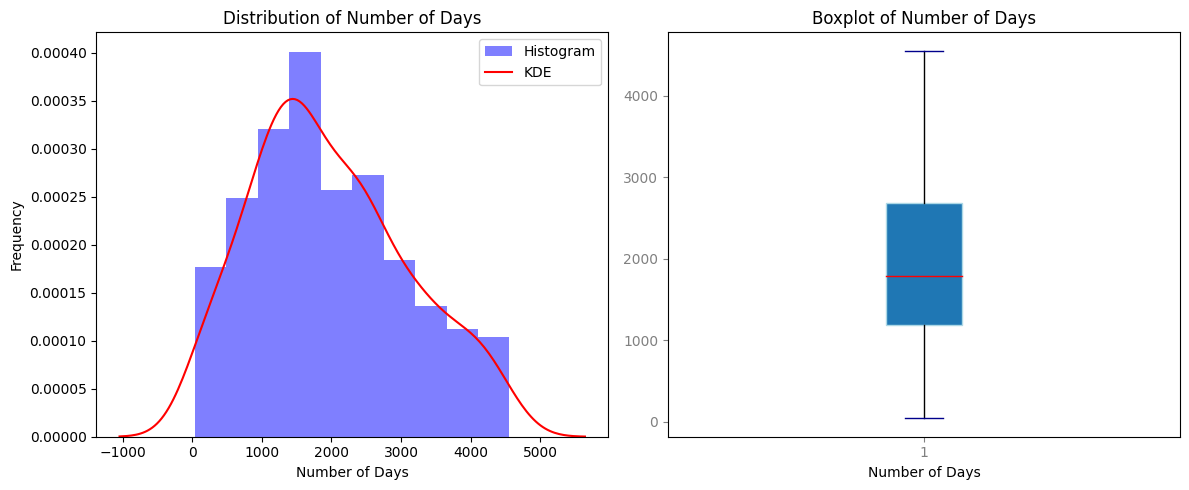

Mean number of days: 1979.1666666666667
Median number of days: 1788.0
Minimum number of days: 41
Maximum number of days: 4556


In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(df['N_Days'], density=True, alpha=0.5, color='blue', label='Histogram')
sns.kdeplot(df['N_Days'], color='red', ax=axs[0], label='KDE')
axs[0].set_title('Distribution of Number of Days')
axs[0].set_xlabel('Number of Days')
axs[0].set_ylabel('Frequency')
axs[0].legend()
box_color = 'lightblue'
whisker_color = 'darkblue'
median_color = 'red'
flier_color = 'green'
axs[1].boxplot(
    df['N_Days'],
    boxprops={'color': box_color},
    capprops={'color': whisker_color},
    medianprops={'color': median_color},
    flierprops={'markerfacecolor': flier_color, 'markeredgecolor': flier_color},
    patch_artist=True,
)
axs[1].set_title('Boxplot of Number of Days')
axs[1].set_xlabel('Number of Days')
axs[1].tick_params(axis='x', colors='gray')
axs[1].tick_params(axis='y', colors='gray')
plt.tight_layout()
plt.show()
mean_days = np.mean(df['N_Days'])
median_days = np.median(df['N_Days'])
min_days = np.min(df['N_Days'])
max_days = np.max(df['N_Days'])
print("Mean number of days:", mean_days)
print("Median number of days:", median_days)
print("Minimum number of days:", min_days)
print("Maximum number of days:", max_days)

**Hypothesis Testing**

**Number of Days vs Status**





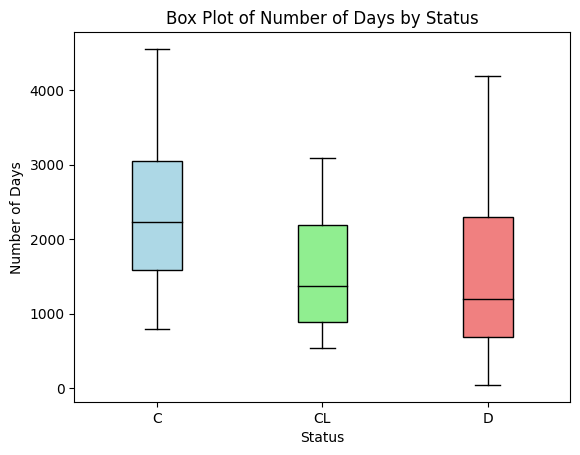

ANOVA F-statistic: 25.49
ANOVA p-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     C     CL -880.1712 0.0019 -1483.2679 -277.0745   True
     C      D -883.2328    0.0 -1186.9222 -579.5434   True
    CL      D   -3.0616 0.9999  -616.7346  610.6115  False
----------------------------------------------------------


In [ ]:

c_days = df['N_Days'][df['Status'] == 'C']
cl_days = df['N_Days'][df['Status'] == 'CL']
d_days = df['N_Days'][df['Status'] == 'D']
data_to_plot = [c_days, cl_days, d_days]
fig, ax = plt.subplots()
boxplot = ax.boxplot(data_to_plot, labels=['C', 'CL', 'D'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for median in boxplot['medians']:
    median.set_color('black')
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Status')
plt.show()
f_statistic, p_value = stats.f_oneway(c_days, cl_days, d_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Status'])
print(tukey_results)

**Stage of Disease vs Status**

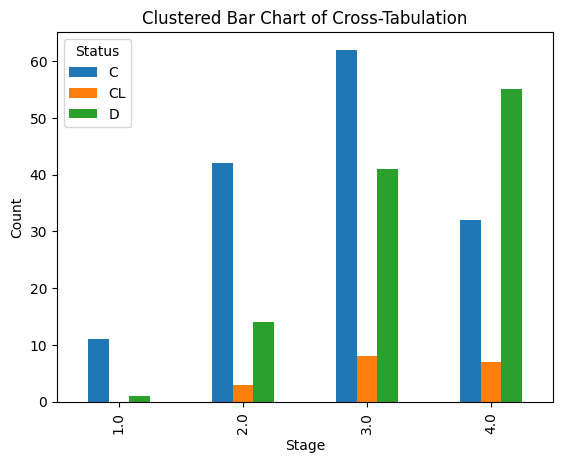

Cross-Tabulation:
Status   C  CL   D
Stage             
1.0     11   0   1
2.0     42   3  14
3.0     62   8  41
4.0     32   7  55
P-value: 4.188796749318097e-05


In [ ]:

Xtab = pd.crosstab(df['Stage'], df['Status'])
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Distributed Machine Learning**

**Features Transformation**

In [ ]:
columns = df[['Stage', 'Age', 'Ascites', 'Hepatomegaly',
              'Spiders', 'Edema', 'Bilirubin', 'Albumin',
              'Copper', 'Cholesterol', 'Prothrombin', 'Status']]
df = pd.get_dummies(columns, drop_first=True)

df.head()

,Stage,Age,Bilirubin,Albumin,Copper,Cholesterol,Prothrombin,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Status_CL,Status_D
0,4.0,58,14.5,2.60,156.0,261.0,12.2,1,1,1,0,1,0,1
1,3.0,56,1.1,4.14,54.0,302.0,10.6,0,1,1,0,0,0,0
2,4.0,70,1.4,3.48,210.0,176.0,12.0,0,0,0,1,0,0,1
3,4.0,54,1.8,2.54,64.0,244.0,10.3,0,1,1,1,0,0,1
4,3.0,38,3.4,3.53,143.0,279.0,10.9,0,1,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage           276 non-null    float64
 1   Age             276 non-null    int64  
 2   Bilirubin       276 non-null    float64
 3   Albumin         276 non-null    float64
 4   Copper          276 non-null    float64
 5   Cholesterol     276 non-null    float64
 6   Prothrombin     276 non-null    float64
 7   Ascites_Y       276 non-null    uint8  
 8   Hepatomegaly_Y  276 non-null    uint8  
 9   Spiders_Y       276 non-null    uint8  
 10  Edema_S         276 non-null    uint8  
 11  Edema_Y         276 non-null    uint8  
 12  Status_CL       276 non-null    uint8  
 13  Status_D        276 non-null    uint8  
dtypes: float64(6), int64(1), uint8(7)
memory usage: 19.1 KB


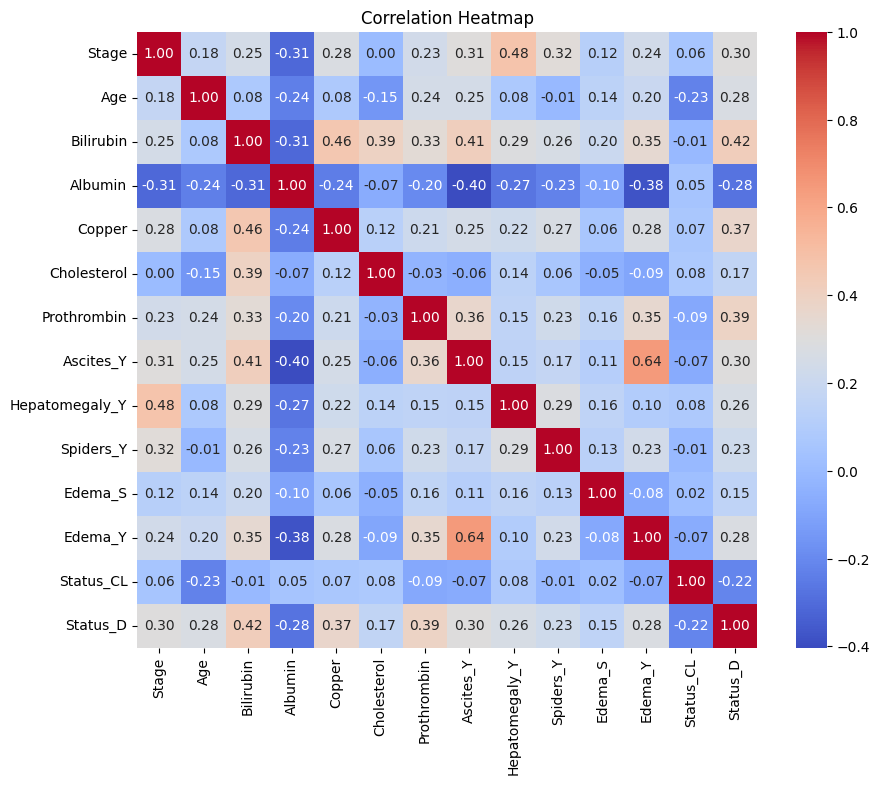

In [ ]:

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

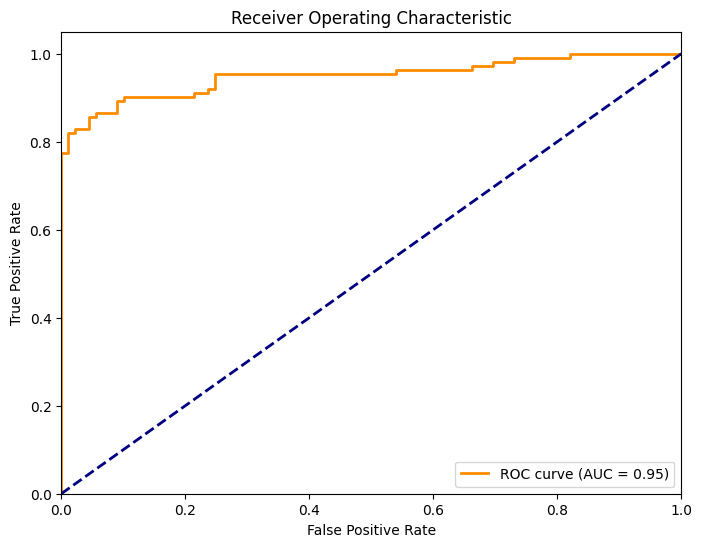

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

<ipython-input-49-16026d93baa7>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(feature1, feature2, cmap='viridis')


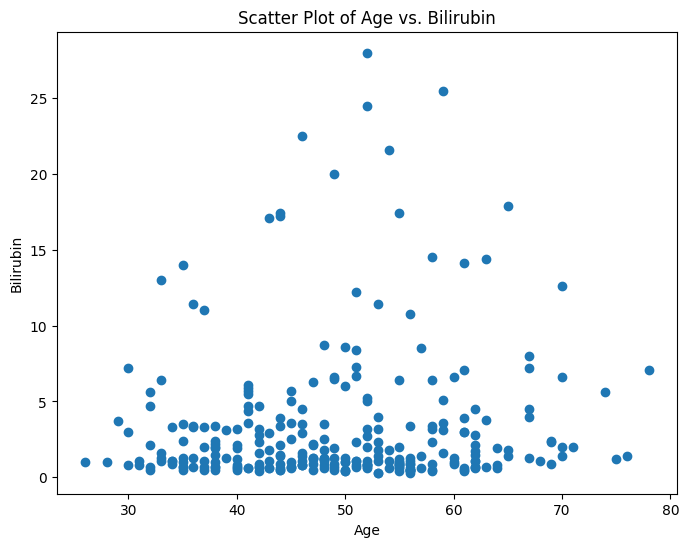

In [ ]:
import matplotlib.pyplot as plt
feature1 = df['Age']
feature2 = df['Bilirubin']
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Bilirubin')
plt.title('Scatter Plot of Age vs. Bilirubin')
plt.show()






**Predictive Model**

**Data splitting**

In [ ]:

X = df[['Stage', 'Age', 'Ascites_Y', 'Hepatomegaly_Y', 'Spiders_Y', 'Edema_Y', 'Bilirubin', 'Copper', 'Prothrombin']]
y = df['Status_D']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Logistic Regression**

In [ ]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[29  1]
 [ 8 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.95      0.69      0.80        26

    accuracy                           0.84        56
   macro avg       0.87      0.83      0.83        56
weighted avg       0.86      0.84      0.84        56



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Hyperparameter Tuning**

In [ ]:

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)


grid_search.fit(X, y)


print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))_
best_logistic_regression = grid_search.best_estimator_
best_logistic_regression.fit(X_train, y_train)
y_pred = best_logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Best Hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.80
Accuracy: 0.8392857142857143
Confusion Matrix:
 [[30  0]
 [ 9 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      0.65      0.79        26

    accuracy                           0.84        56
   macro avg       0.88      0.83      0.83        56
weighted avg       0.88      0.84      0.83        56



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.82


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.77


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy: {:.2f}".format(adaboost_accuracy))

Random Forest Accuracy: 0.82
AdaBoost Accuracy: 0.79
